In [3]:
#Handling imports
# Importing required libraries to get started
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Import dataset
dataset = pd.read_csv('data/pima_diabetes_clean.csv')
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

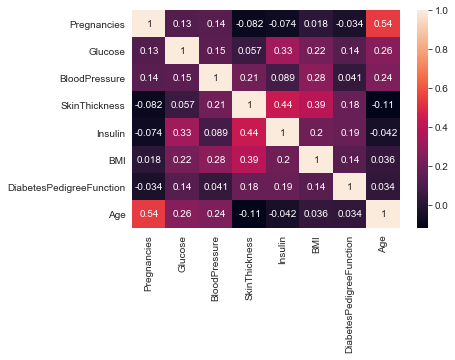

In [6]:
sns.heatmap(X.corr(), annot = True)

In [7]:
#Feature Extraction
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
[  6.  148.   72.   35.    0.   33.6  50. ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6      148             72             35        0  33.6   50
1            1       85             66             29        0  26.6   31
2            8      183             64              0        0  23.3   32
3            1       89             66             23       94  28.1   21
4            0      137             40             35      168  43.1   33
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [9]:
#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [23]:
#Implement SVM with Linear Kernel
classifier = SVC(random_state=0, kernel='rbf',probability=True)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [24]:
#Predict the test set results
y_pred = classifier.predict(X_test)

In [25]:
#Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[98  9]
 [21 26]]
0.6341463414634146
0.8051948051948052


In [26]:
#Saving the Confusion Matrix and splitting into 4 variables 
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[98  9]
 [21 26]]


In [27]:
#Calculating Model Accuracy from the Confusion Matrix
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8051948051948052
0.8051948051948052


In [28]:
#Calculating Classification Error from the Confusion Matrix
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.19480519480519481
0.19480519480519476


In [29]:
#Calculate Sensitivity from the Confusion Matrix
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.5531914893617021
0.5531914893617021


In [30]:
#Calculate Specificity from the Confusion Matrix
specificity = TN / (TN + FP)

print(specificity)

0.9158878504672897


In [31]:
#Calculate the False Positive Rate from the Confusion Matrix
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.08411214953271028
0.08411214953271029


In [32]:
#Calcualte Precision from the Confusion Matrix
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.7428571428571429
0.7428571428571429


In [33]:
#Steps for adjusting the Threshold
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
classifier.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [35]:
# print the first 10 predicted probabilities of class membership
classifier.predict_proba(X_test)[0:10]

array([[0.15946248, 0.84053752],
       [0.85335426, 0.14664574],
       [0.83231552, 0.16768448],
       [0.23035919, 0.76964081],
       [0.82712942, 0.17287058],
       [0.82369753, 0.17630247],
       [0.26231391, 0.73768609],
       [0.09091734, 0.90908266],
       [0.86945486, 0.13054514],
       [0.63538107, 0.36461893]])

In [36]:
# print the first 10 predicted probabilities for class 1
classifier.predict_proba(X_test)[0:10, 1]

array([0.84053752, 0.14664574, 0.16768448, 0.76964081, 0.17287058,
       0.17630247, 0.73768609, 0.90908266, 0.13054514, 0.36461893])

In [37]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

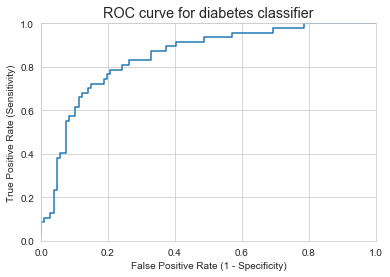

In [38]:
#Plotting ROC Curve
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [39]:
#Finding out the AUC
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8486776695168026


In [41]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, X, y, cv=10, scoring='roc_auc').mean()

0.6494501424501424